# Importing the libraries


In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Pradnya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Accessing the Data


In [5]:

df=pd.read_csv('Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Finding Null values if any

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Correlation Between Features

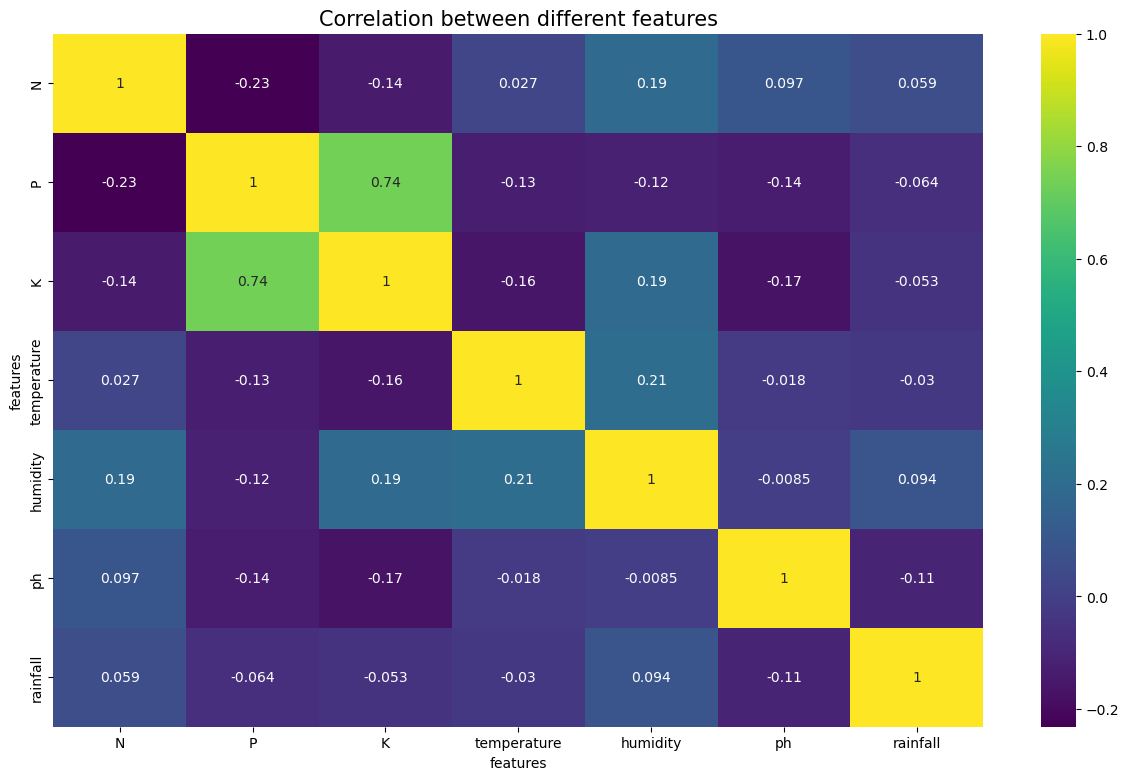

In [10]:
fig,ax = plt.subplots(1,1,figsize=(15, 9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
 
plt.title('Correlation between different features',fontsize=15,c='black')
plt.show()

# This visualization tells us that your Data is balanced or not

<AxesSubplot:xlabel='count', ylabel='label'>

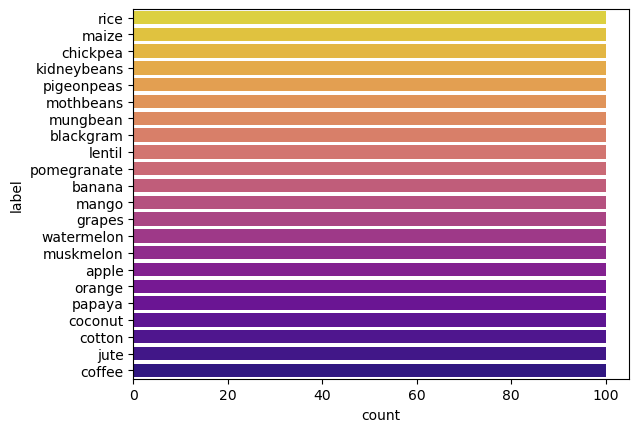

In [11]:
sns.countplot(y='label',data=df, palette="plasma_r")

# Lets visualize the specific case during rainy season

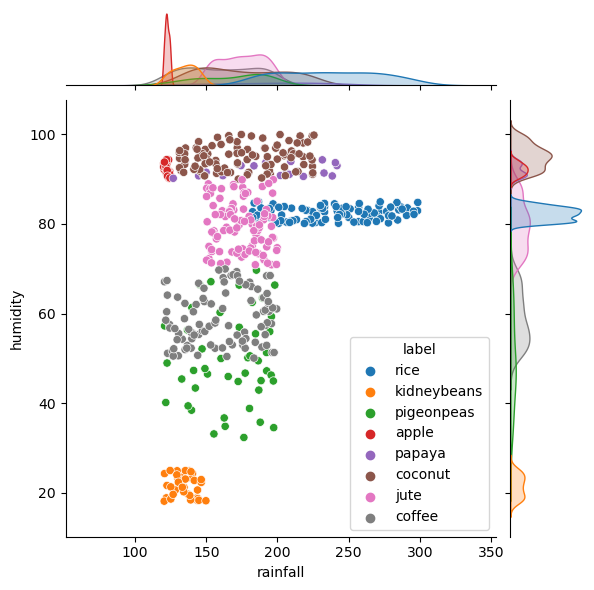

In [12]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

C:\Users\Pradnya\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


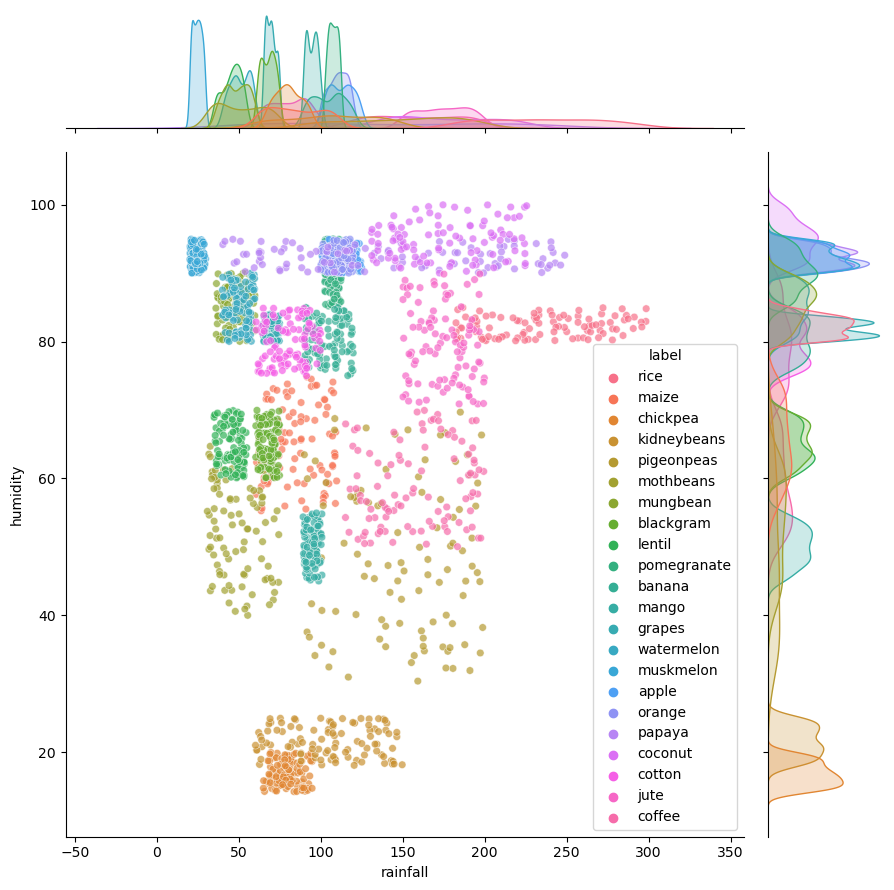

In [13]:
sns.jointplot(x="rainfall",y="humidity",data=df,hue='label',size=9,s=30,alpha=0.7)

In [14]:
x=df.drop('label',axis=1)
y=df['label']

C:\Users\Pradnya\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


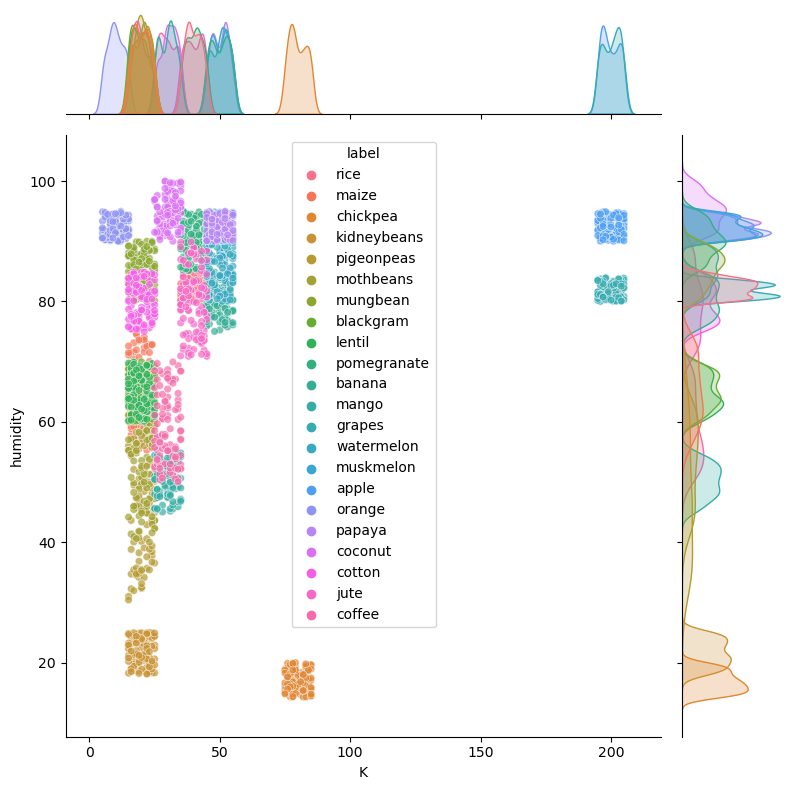

In [15]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

When Humidity is Less than 65,which could be grown just based on the amount of rain expected over the next few weeks.

<AxesSubplot:xlabel='K', ylabel='rainfall'>

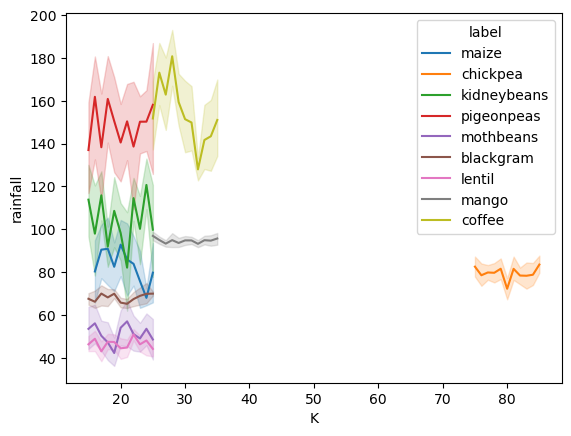

In [16]:

sns.lineplot(data=df[(df['humidity']<65)],x="K",y="rainfall",hue="label")

When Phosphorous levels are quite differentiable and its rains heavily (above 150 mm).

<AxesSubplot:xlabel='P', ylabel='label'>

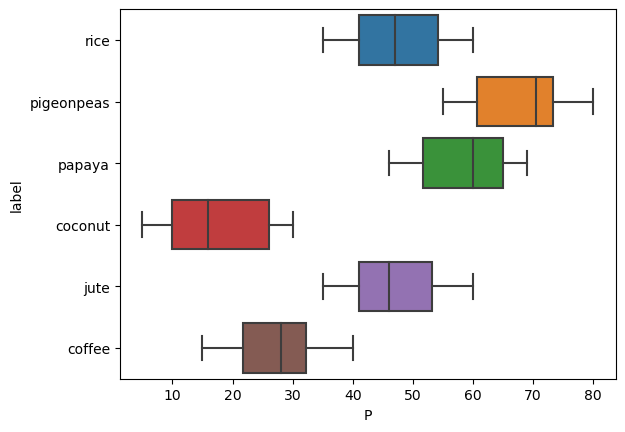

In [17]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

<AxesSubplot:xlabel='ph', ylabel='label'>

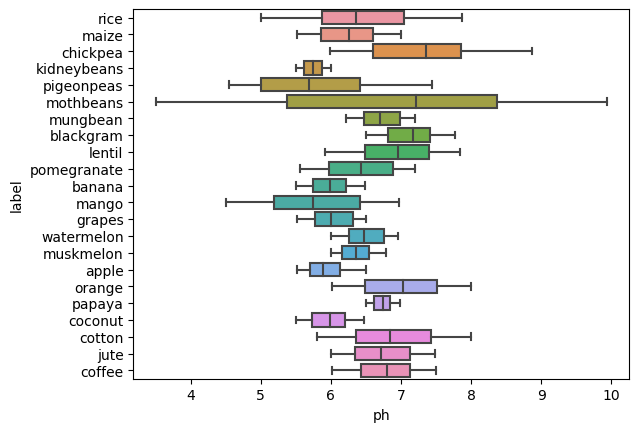

In [18]:
sns.boxplot(y='label',x='ph',data=df)

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [23]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1276 to 1263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [24]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1760 entries, 1863 to 1061
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


# Using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Pradnya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
logistic_reg_acc=accuracy_score(y_test,y_pred)
print("Logistic accuracy is "+str(logistic_reg_acc))

Logistic accuracy is 0.9704545454545455


# Using Decision Tree algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [30]:
decision_acc=accuracy_score(y_test,y_pred2)
print("Decision tree accuracy is "+str(decision_acc))

Decision tree accuracy is 0.9931818181818182


# Using Random Forest algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [32]:
random_acc=accuracy_score(y_test,y_pred2)
print("Random Forest accuracy is "+str(random_acc))

Random Forest accuracy is 0.9931818181818182


we will go with Decision Tree algorithm as Random Forest Takes time to get Train 

In [33]:
import joblib

In [34]:
filename='Crop_app'

In [35]:
joblib.dump(model2,'Crop_app')

['Crop_app']

In [36]:
app=joblib.load('Crop_app')

In [37]:
arr=[[104,18,30,23.603016,60.396475,6.779833,140.937041]]
y_pred5=app.predict(arr)

C:\Users\Pradnya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
y_pred5

array(['coffee'], dtype=object)